In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


## Import the Fashion MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The `labels` are an array of integers, ranging from 0 to 9.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

In [7]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

## Preprocess the data

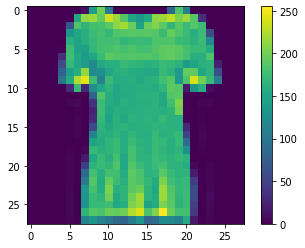

In [9]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way.

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

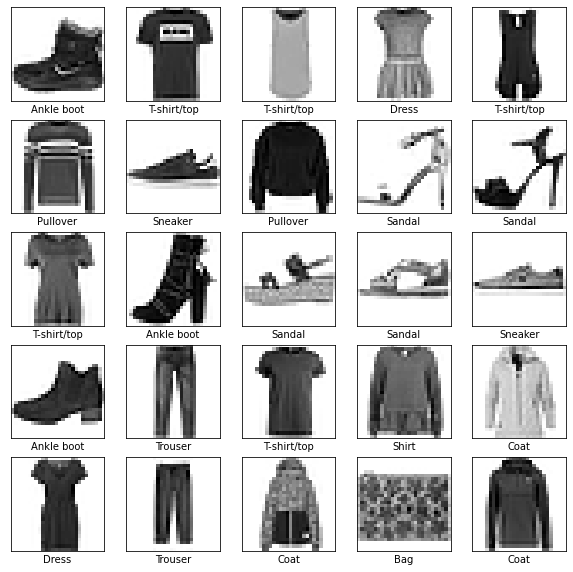

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

### Set up the layers

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Train the model

### Feed the model

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5038 - accuracy: 0.8225
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3811 - accuracy: 0.8629
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3391 - accuracy: 0.8756
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3133 - accuracy: 0.8836
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2943 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2803 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2686 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2570 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2486 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.238

### Evaluate accuracy

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.3283 - accuracy: 0.8833
Test accuracy: 0.8833000063896179


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This represents **overfitting**.

### Make predictions

In [17]:
predictions = model.predict(test_images)

In [18]:
predictions[0]

array([2.9137180e-07, 3.0156091e-08, 3.9126893e-09, 1.0534151e-06,
       3.5278356e-09, 6.8263977e-04, 1.9837955e-06, 6.5982998e-03,
       1.4190452e-06, 9.9271423e-01], dtype=float32)

In [19]:
# return index, not value
np.argmax(predictions[0])

9

In [21]:
def plot_images(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Verify predictions

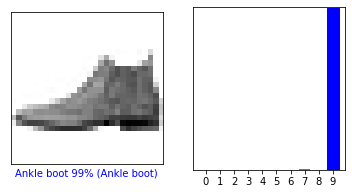

In [22]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_images(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

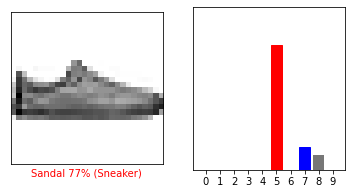

In [23]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_images(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

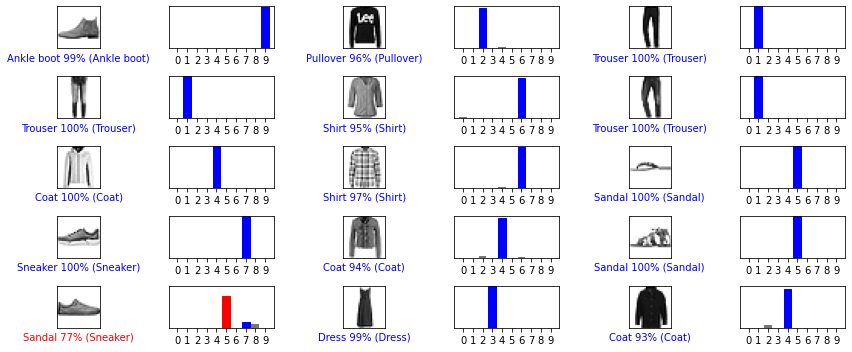

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, num_rows))

for i in range(num_images):
    # subplot 5 rows 6 cols
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_images(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

In [25]:
img = test_images[1]

print(img.shape)

(28, 28)


In [27]:
img = tf.expand_dims(img, 0)

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.2819699e-05 1.1378883e-09 9.6353191e-01 1.0768662e-10 3.2607786e-02
  7.1782691e-10 3.8475664e-03 7.5783138e-12 3.6501568e-09 1.3836251e-11]]


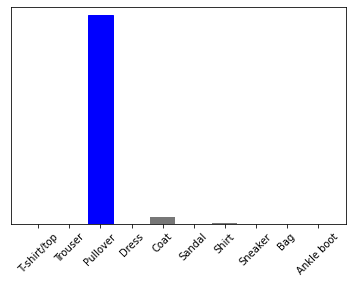

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
np.argmax(predictions_single)

2

## References

- https://www.tensorflow.org/tutorials/keras/classification